### This program transfers the style taken from Composition VII, a painting by Russian artist Wassily Kandinsky, to an image of a dog using Tensorflow. It is based on a tutorial found on Tensorflow's website.

In [12]:
import os
import tensorflow as tf
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False
import tensorflow_hub as hub

import numpy as np
import PIL.Image
import time
import functools

In [3]:
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.array(tensor,dtype = np.uint8)
    if np.ndim(tensor) > 3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [4]:
content_file = 'YellowLabradorLooking_new.jpg'
content_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg'

style_file = 'kandinsky5.jpg'
style_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg'

content_path = tf.keras.utils.get_file(content_file,content_url)
style_path = tf.keras.utils.get_file(style_file,style_url)

196608/195196 [==============================] - 0s 2us/step


In [7]:
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img,channels = 3)
    img = tf.image.convert_image_dtype(img,tf.float32)
    
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim/long_dim
    
    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis,:]
    
    return img

def imshow(image, title = None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis = 0)
        
    plt.imshow(image)
    if title:
        plt.title(title)

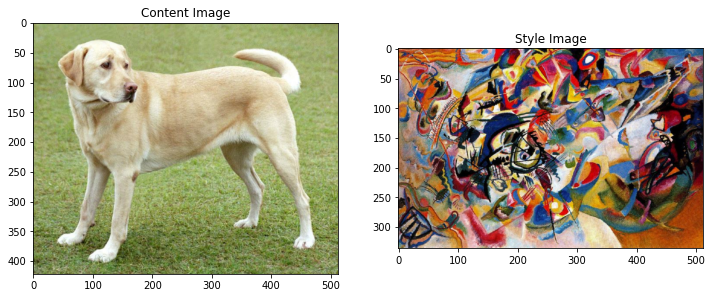

In [17]:
content_img = load_img(content_path)
style_img = load_img(style_path)

plt.subplot(1,2,1)
imshow(content_img,'Content Image')

plt.subplot(1,2,2)
imshow(style_img,'Style Image')

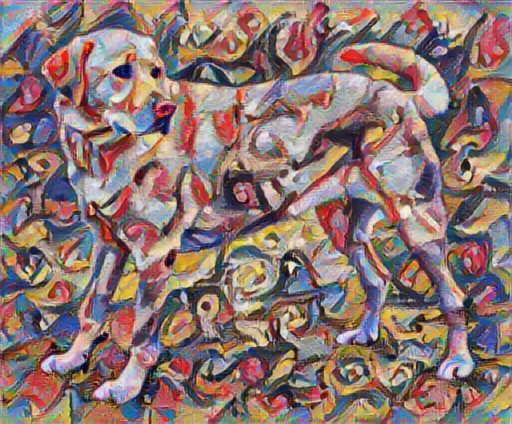

In [18]:
model = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'

hub_model = hub.load(model)
stylized_image = hub_model(tf.constant(content_img),tf.constant(style_img))[0]
tensor_to_image(stylized_image)